## Регрессия

In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
def polynom(x, weight):
    y = 0
    for i, w in enumerate(weight):
        y += w * (x ** i)
    
    return y

In [3]:
def fun1(x):
    return -x**3 + x**2 + 5

def fun2(x):
    return np.cos(x)

def fun3(x):
    return x * np.sin(x)

In [4]:
def weights(x, y, M):
    A = np.zeros(shape=(M + 1, M + 1))
    b = np.zeros(shape=(M + 1,))
    
    for i in range(M + 1):
        b[i] = np.sum((x ** i) * y)
        for j in range(M + 1):
            A[i][j] = np.sum(x ** (i + j))
    
    return np.linalg.solve(A, b)

In [5]:
def gen(x, error_func, func):
    return np.array([error_func(x_i, func) for x_i in x])

In [6]:
def show_graph(M, fun, mse, polynom, weight, x, y, x_o, y_o):
    plt.title(f'M = {M}, MSE = {mse}')
    plt.plot(x_o, y_o, 'b-')
    plt.plot(x_o, polynom(x_o, weight), 'g-')
    plt.plot(x, y, 'ro')
    plt.show()

# Равномерная ошибка

In [7]:
def error_uniform(x, func):
    return func(x) + random.uniform(-0.5, 0.5)

In [8]:
N = 30
x = np.sort(np.random.uniform(0, math.pi * 2, N))

In [9]:
def do_all(x, func, error_func):
    x_origin = np.linspace(0, math.pi * 2, 100)
    y_origin = [func(x_i) for x_i in x_origin]

    y = gen(x, error_func, func)
    for j in range(0, 16):
        W = weights(x, y, j)
        predict = np.array([polynom(x_i, W) for x_i in x])
        mse = mean_squared_error(y, predict)

        show_graph(j, fun1, mse, polynom, W, x, y, x_origin, y_origin)

### Первая функция (полином)

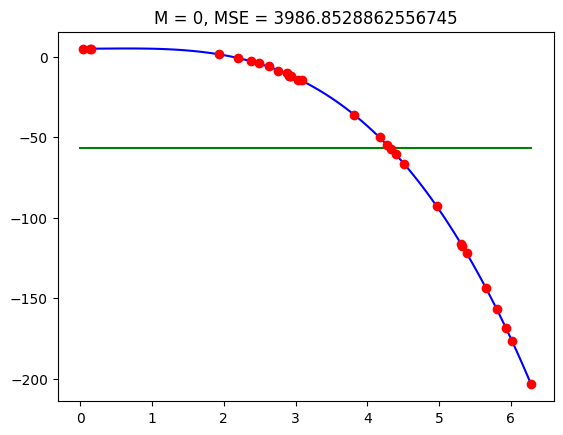

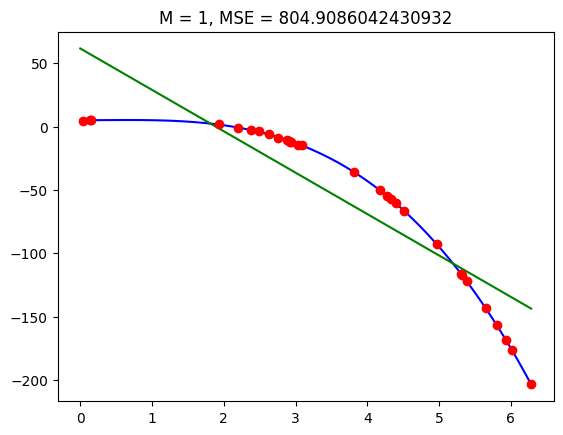

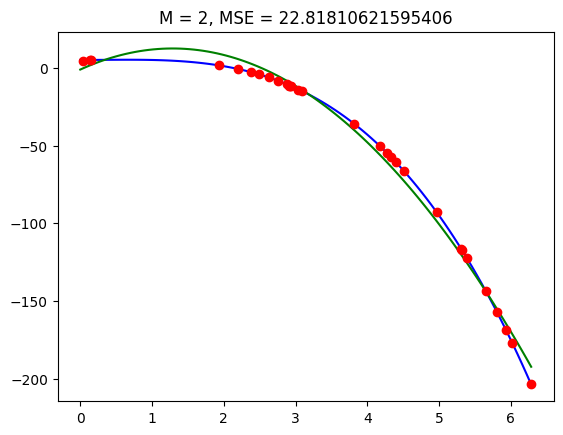

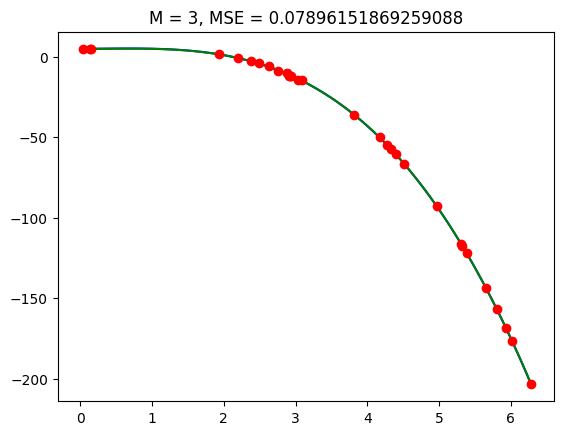

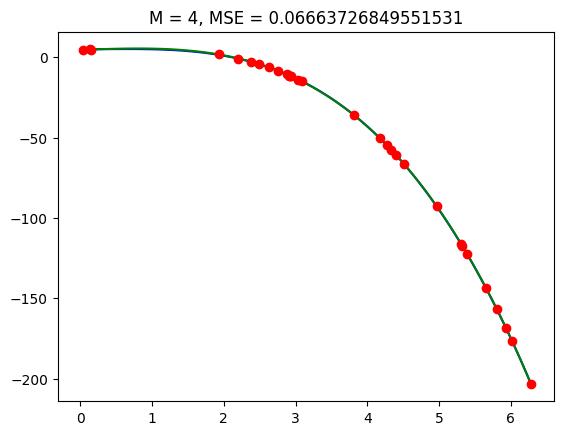

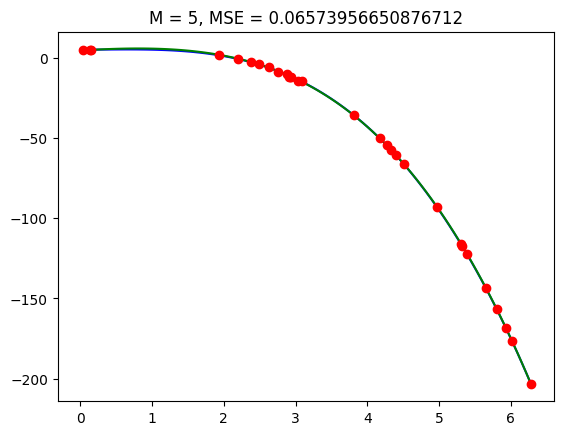

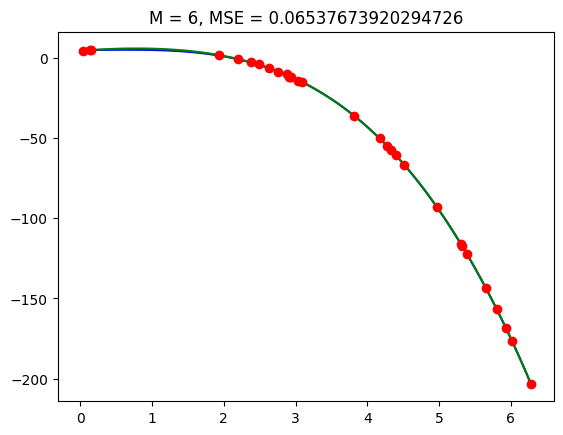

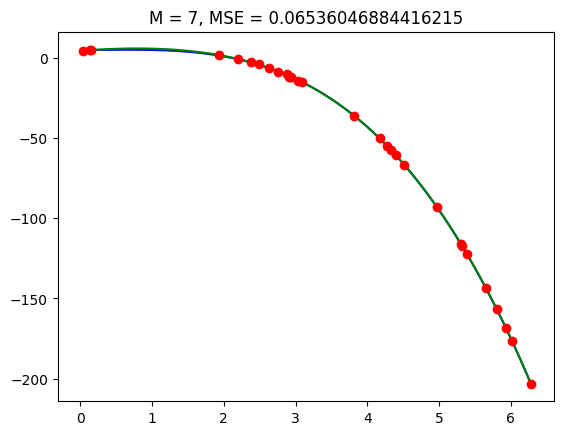

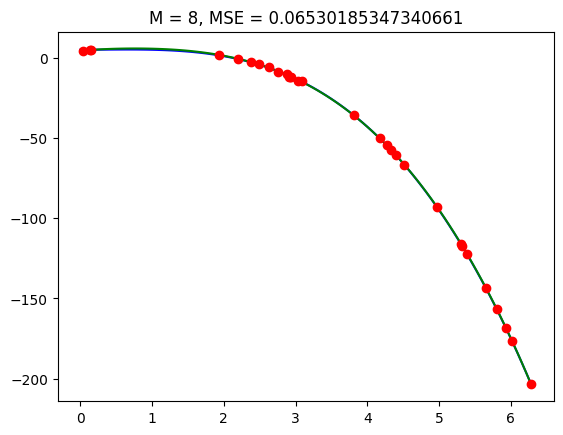

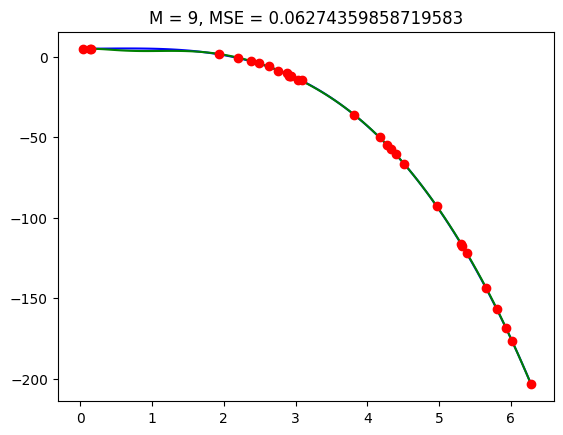

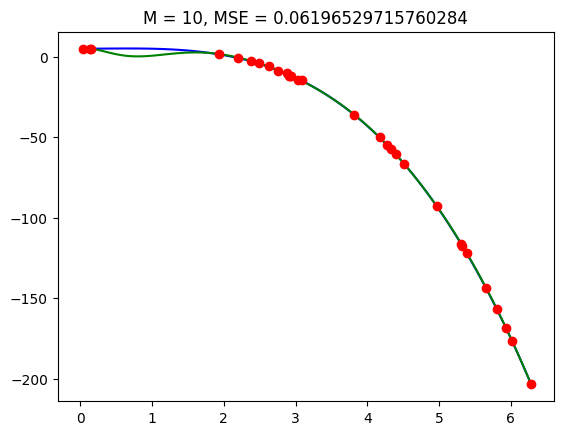

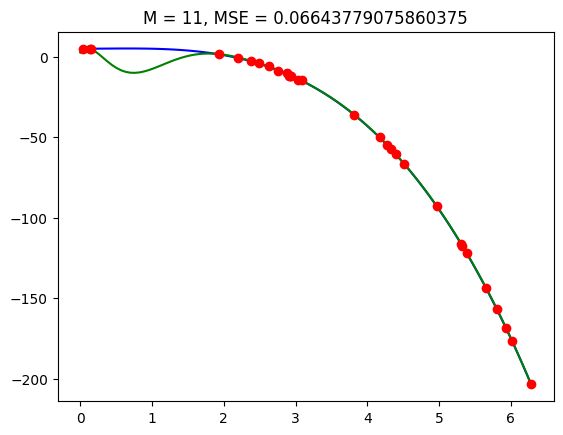

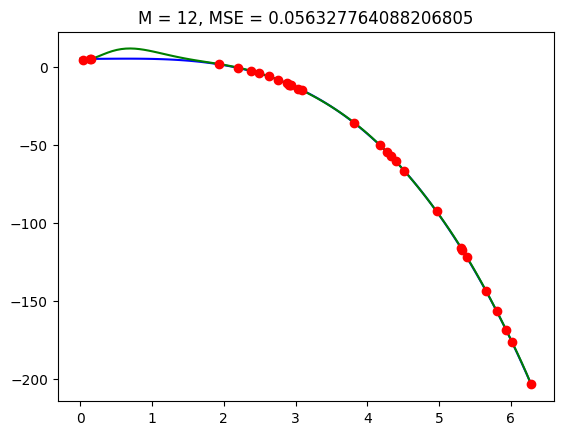

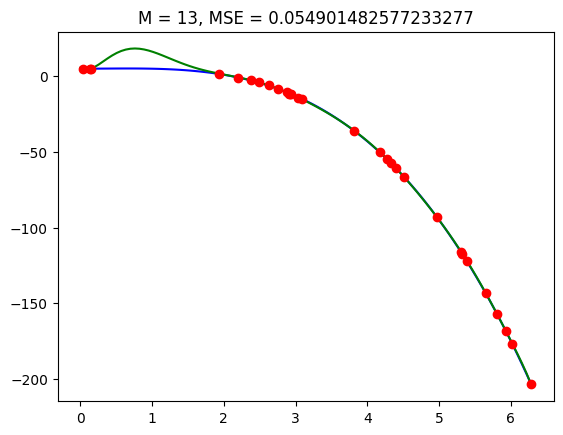

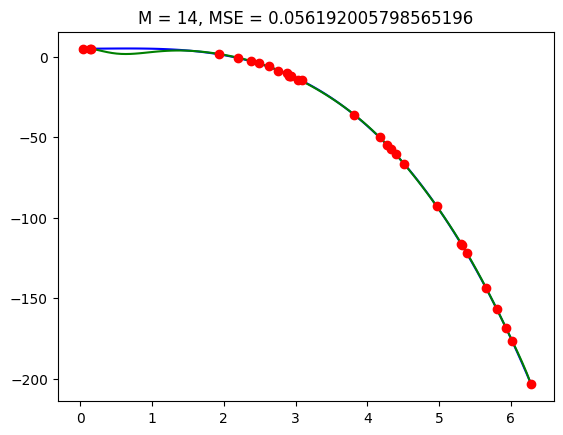

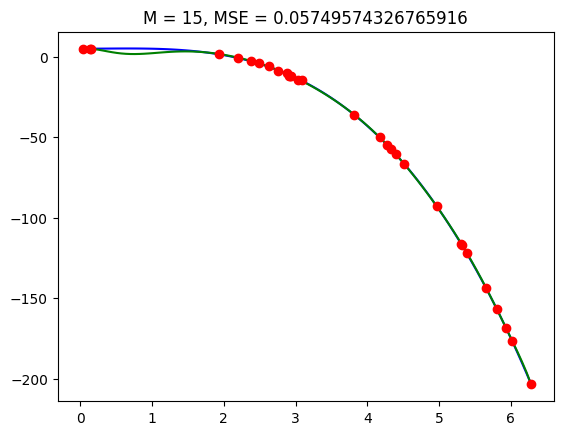

In [10]:
do_all(x, fun1, error_uniform)
# x_origin = np.linspace(0, math.pi * 2, 100)
# y_origin = [fun1(x_i) for x_i in x_origin]

# y = gen(x, error_uniform, fun1)
# for j in range(0, 16):
#     W = weights(x, y, j)
#     predict = np.array([polynom(x_i, W) for x_i in x])
#     mse = mean_squared_error(y, predict)

#     show_graph(j, fun1, mse, polynom, W, x, y, x_origin, y_origin)

### Вторая функция (косинус)

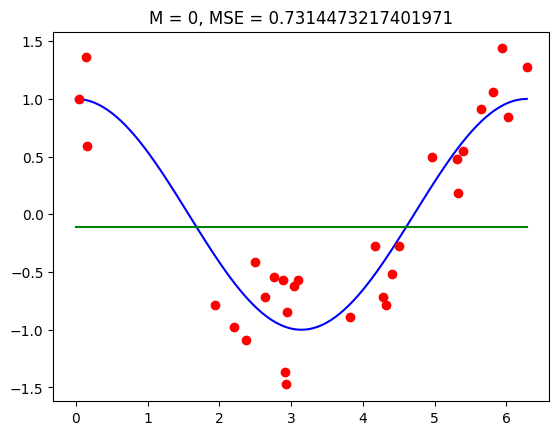

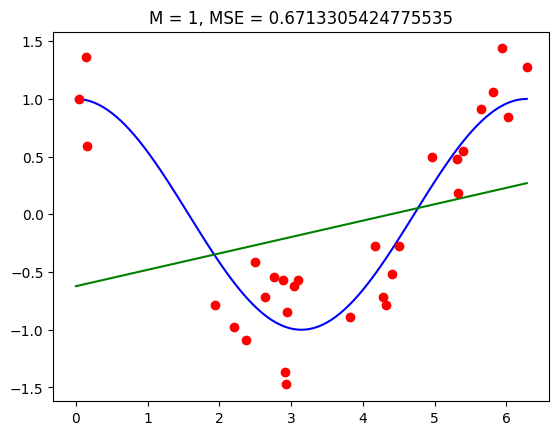

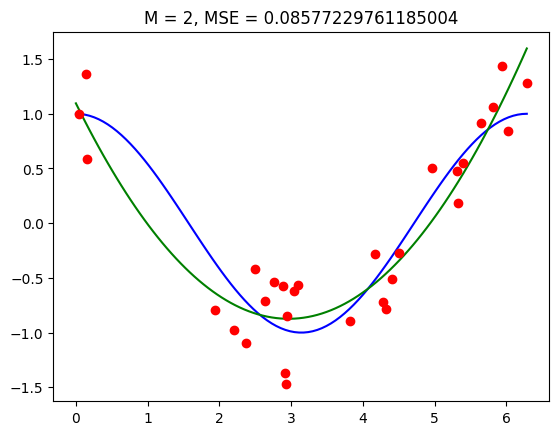

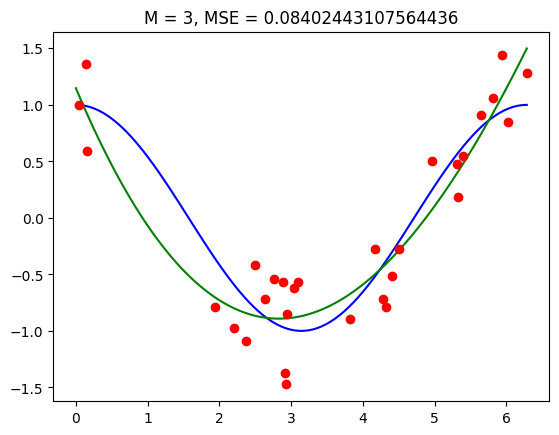

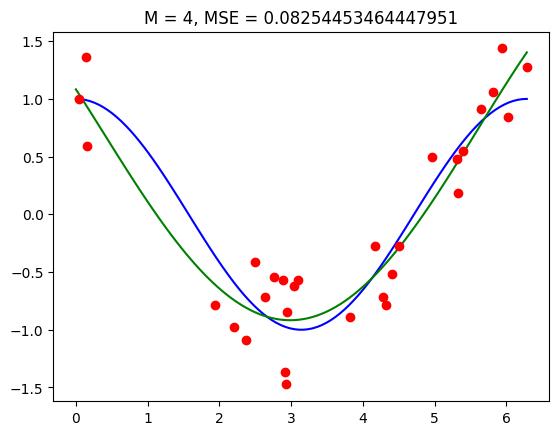

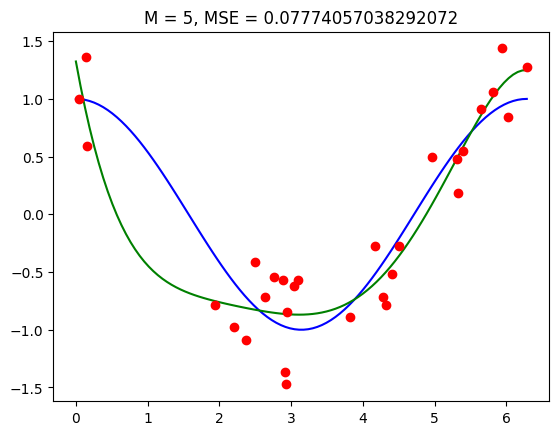

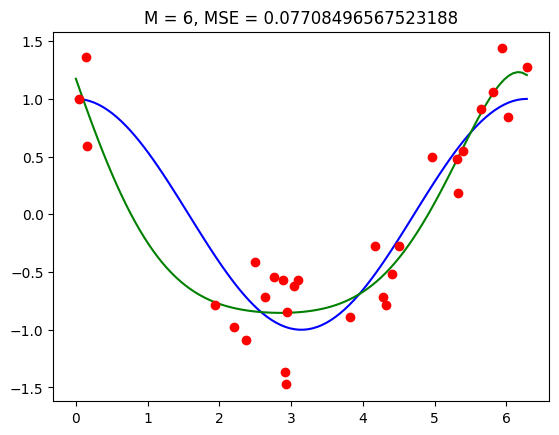

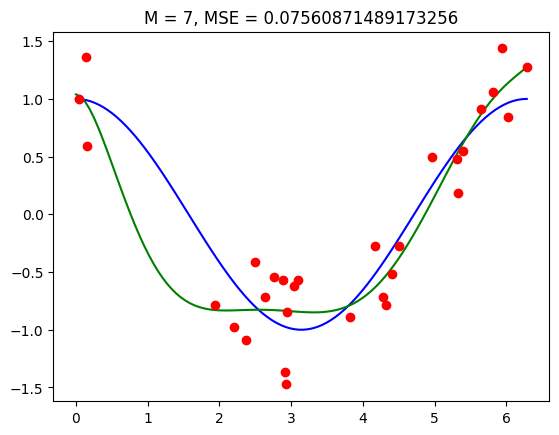

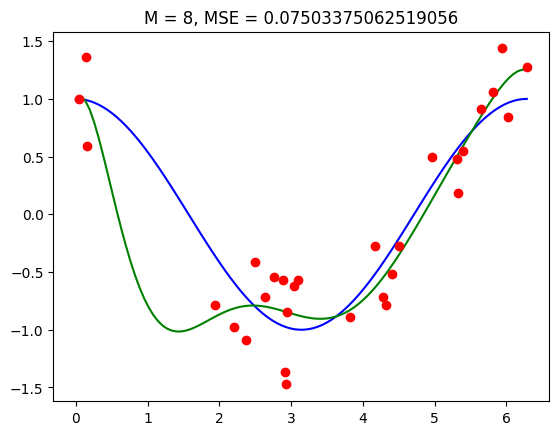

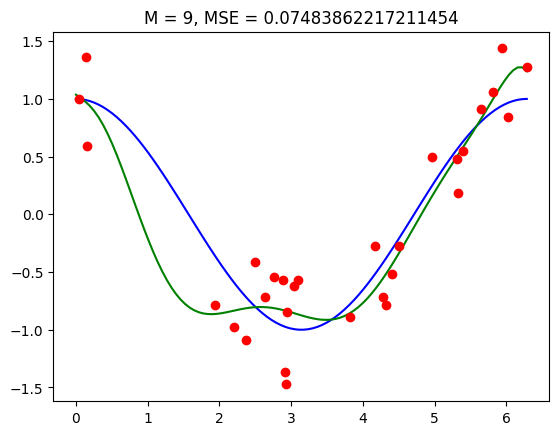

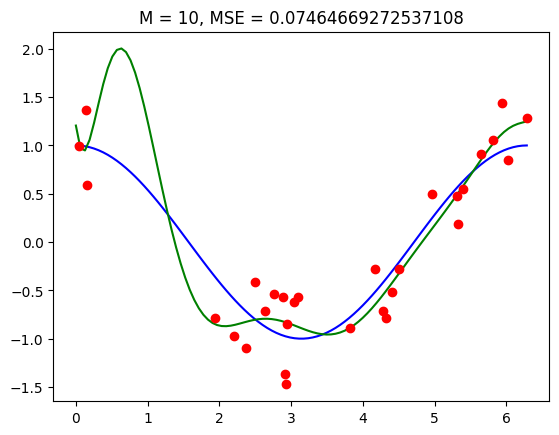

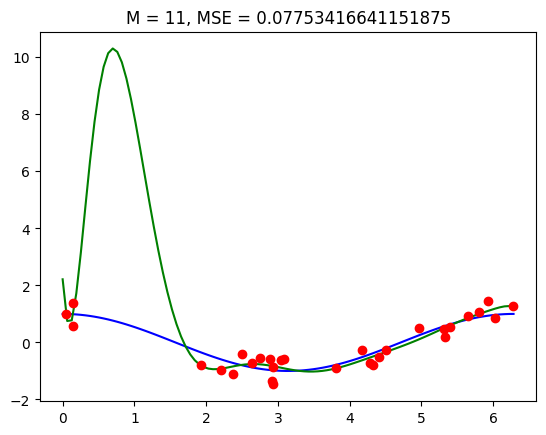

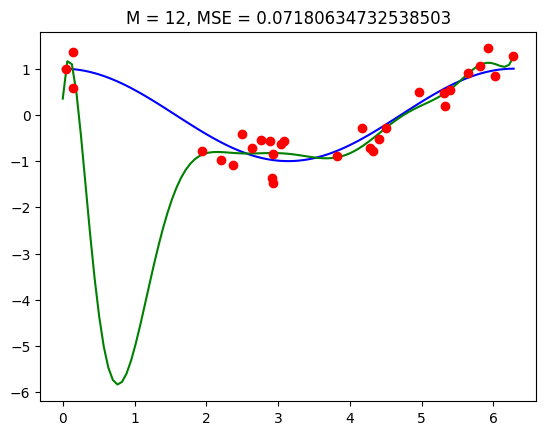

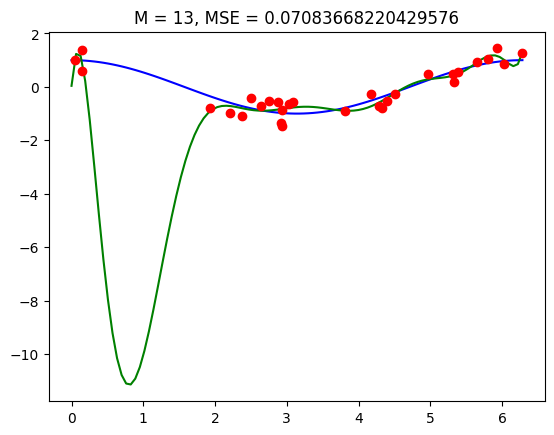

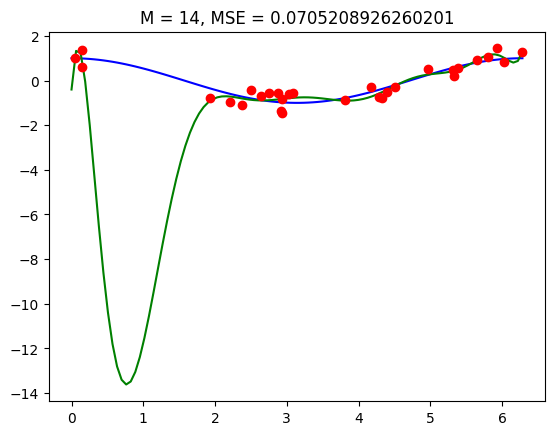

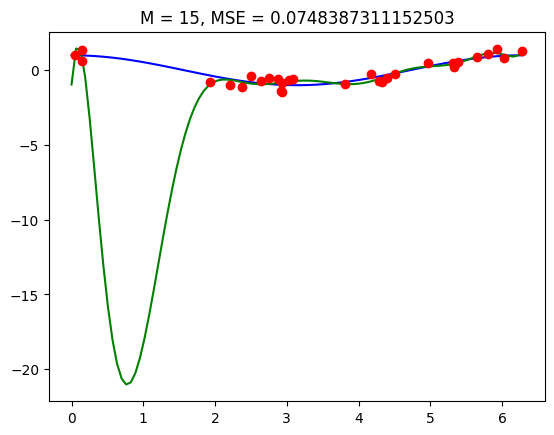

In [11]:
do_all(x, fun2, error_uniform)

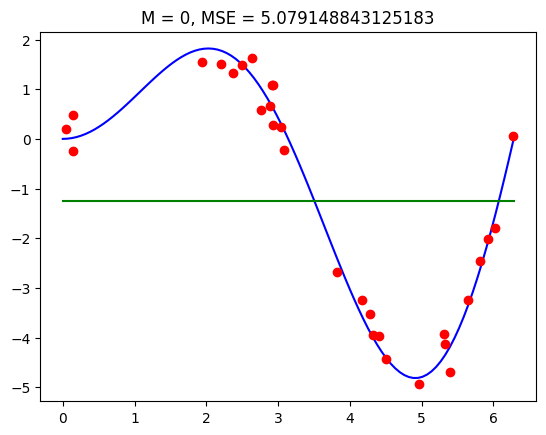

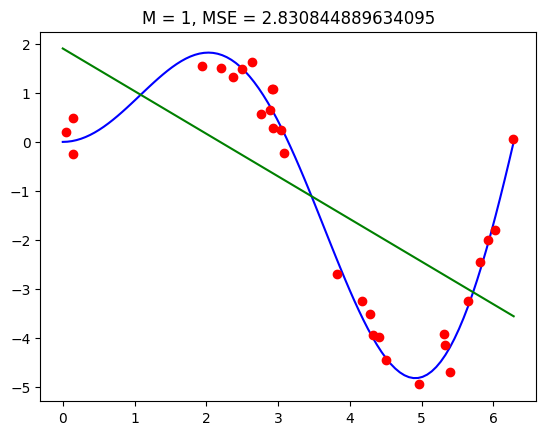

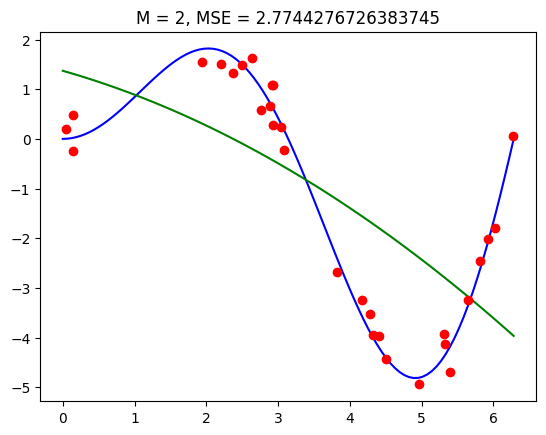

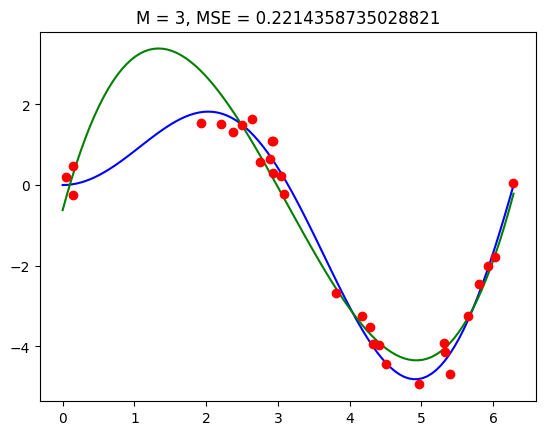

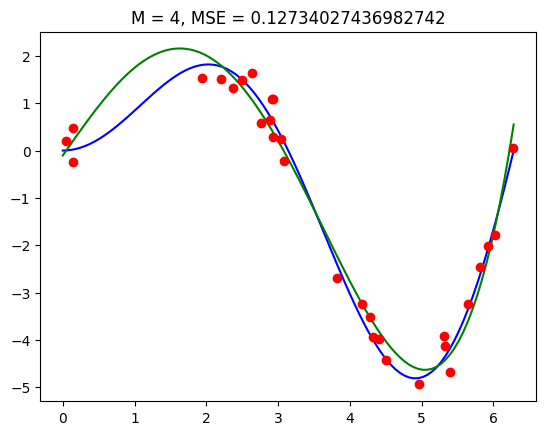

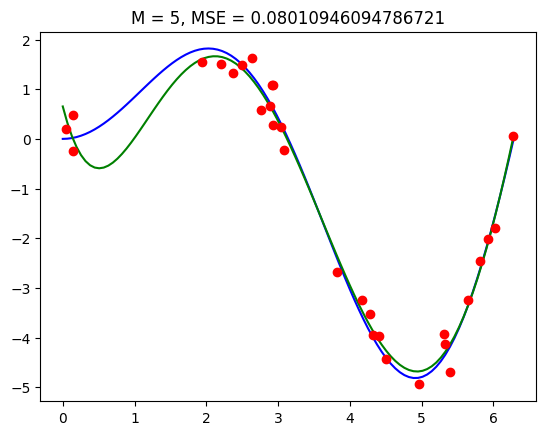

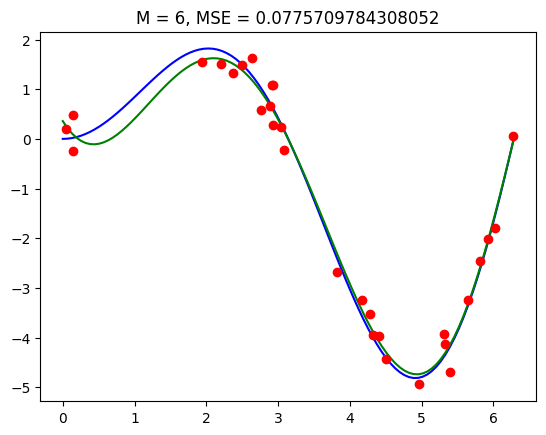

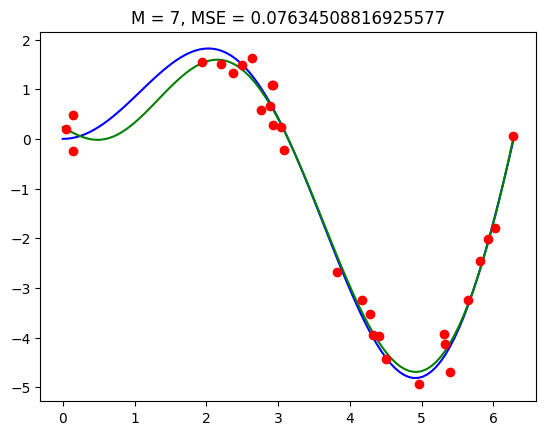

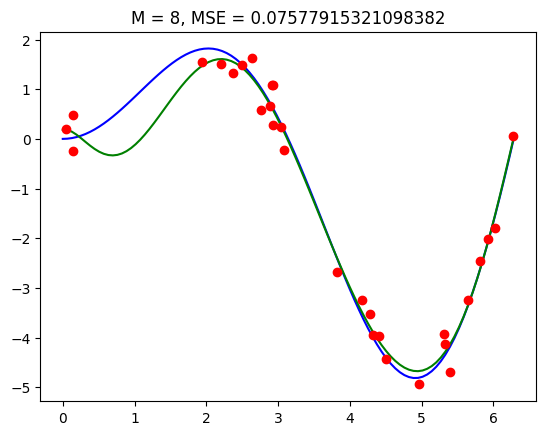

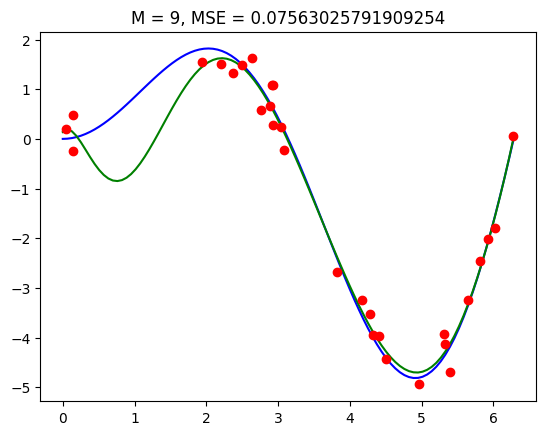

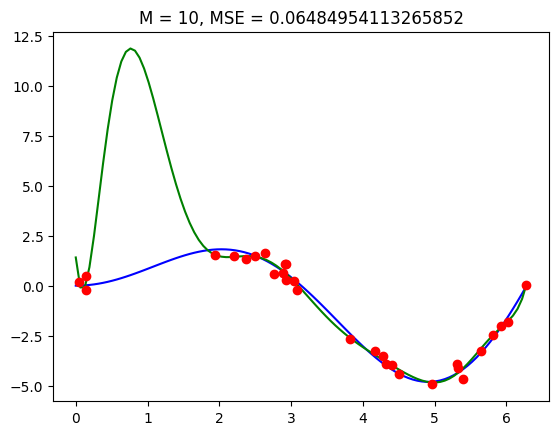

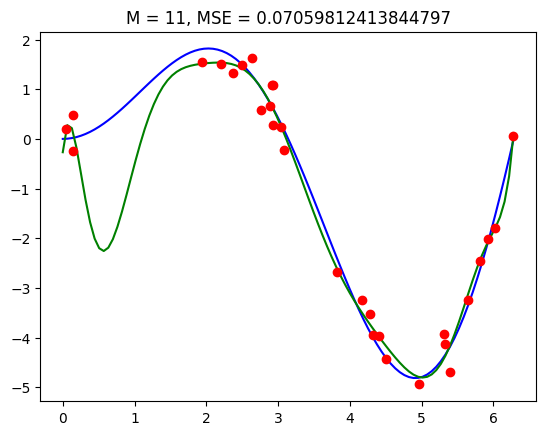

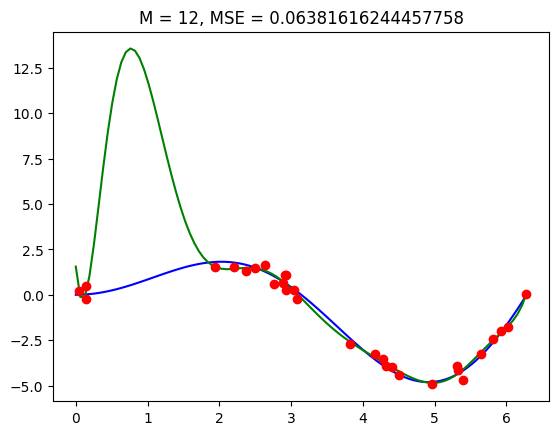

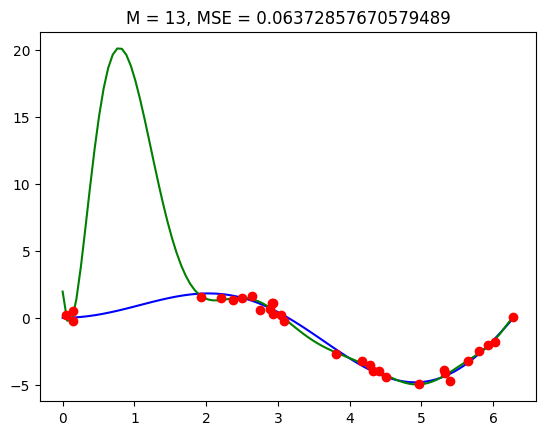

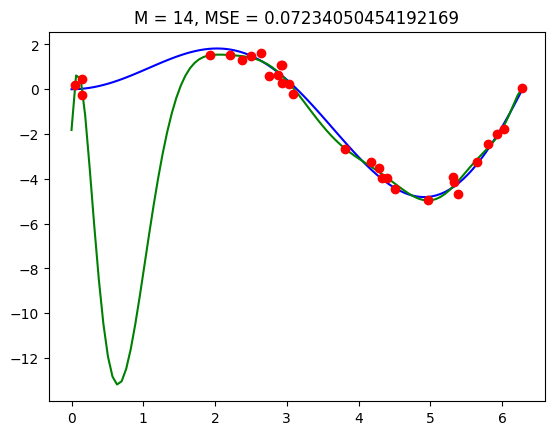

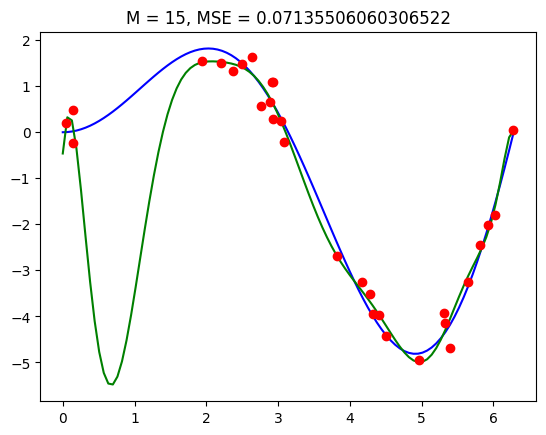

In [12]:
do_all(x, fun3, error_uniform)

### Нормально распределенная ошибка

In [23]:
def error_normal(x, func):
    return func(x) + random.normalvariate(0, 0.5)

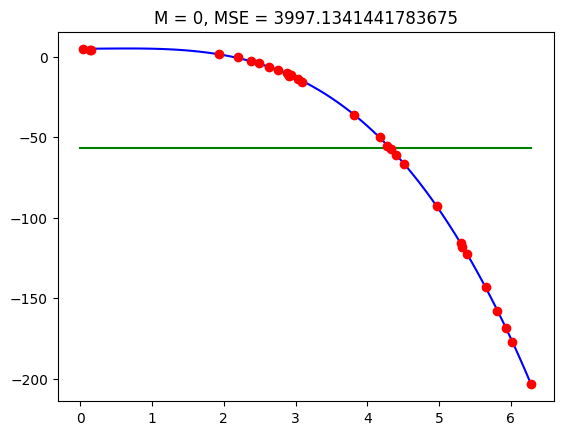

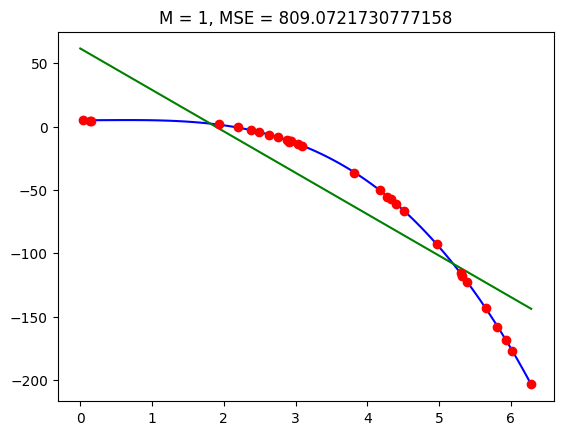

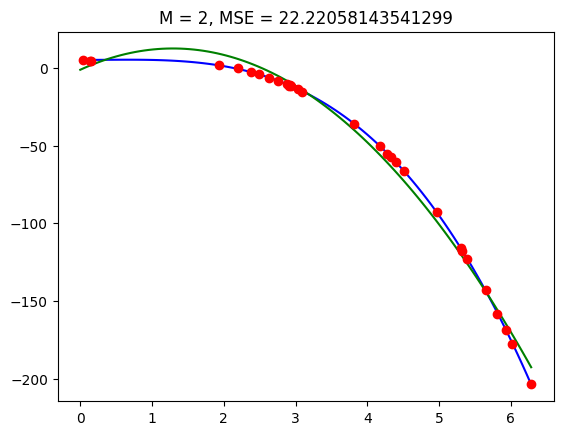

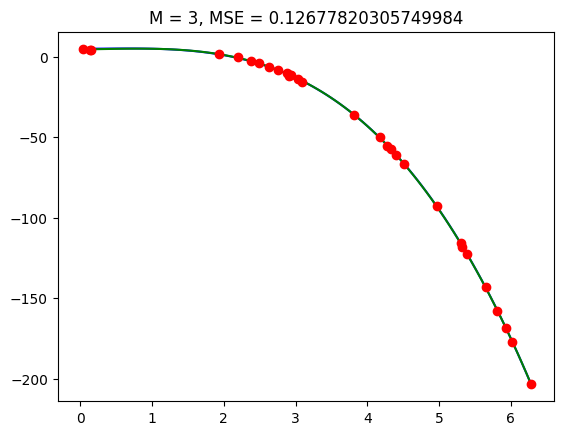

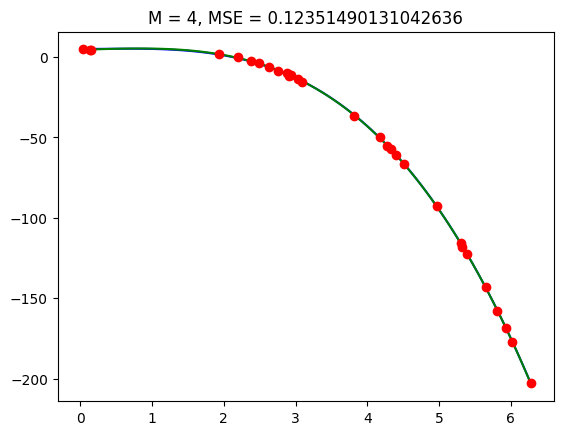

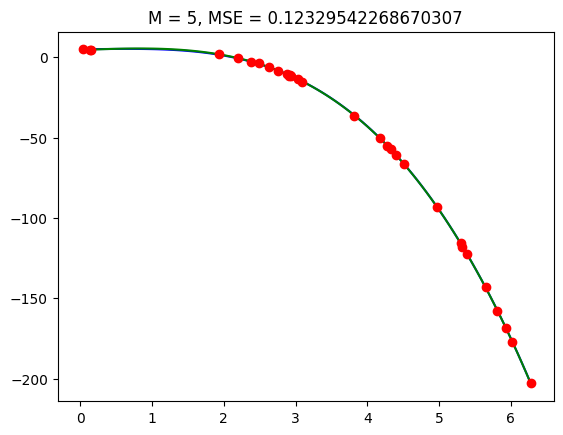

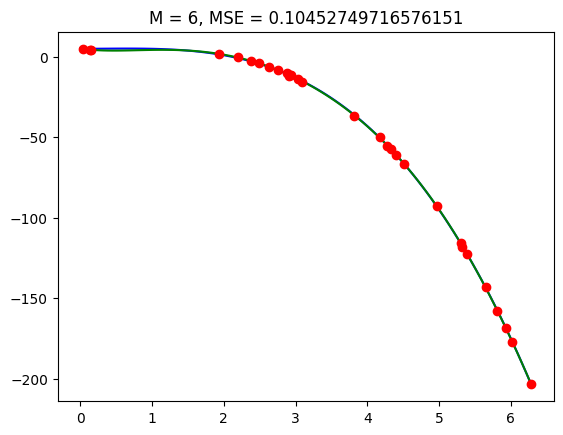

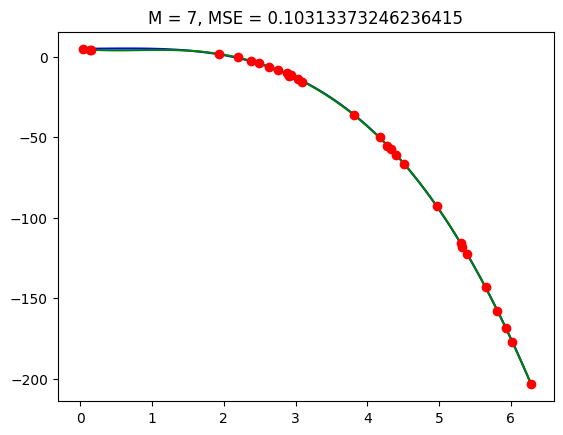

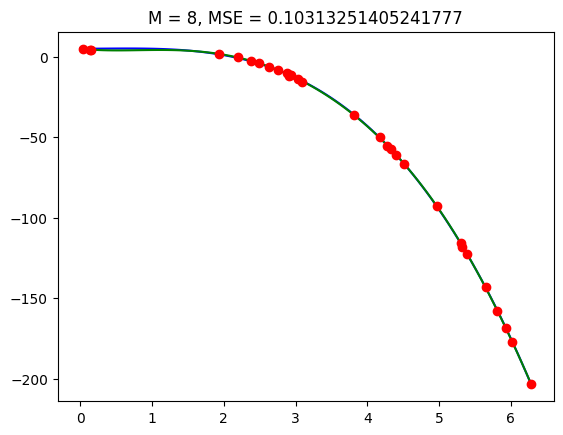

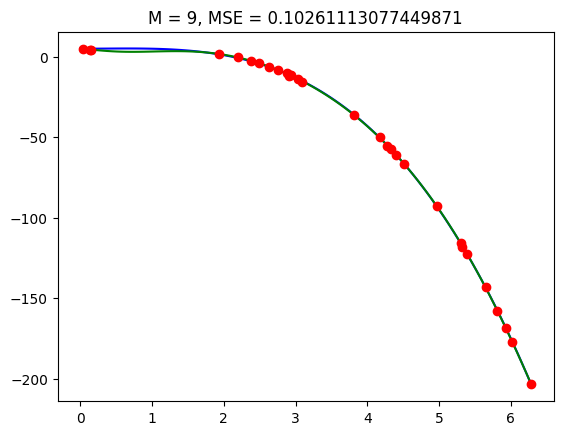

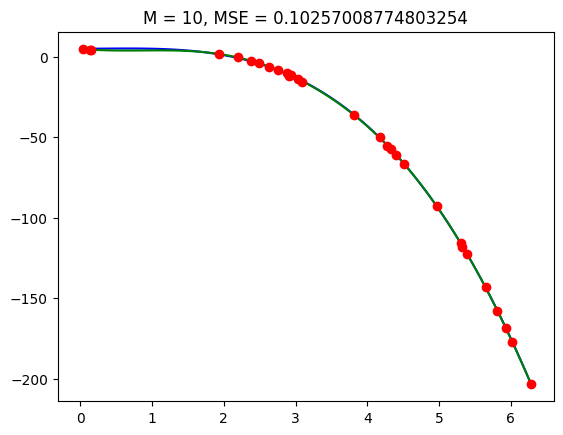

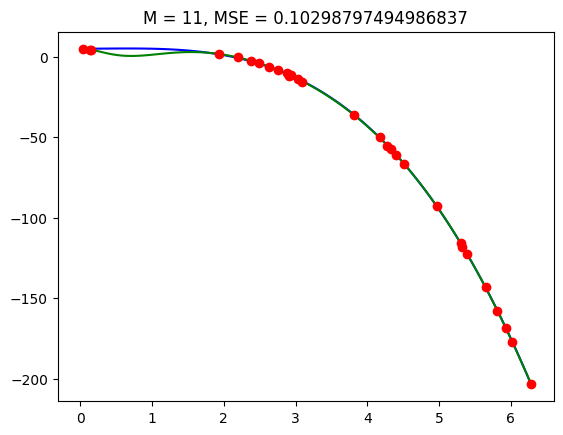

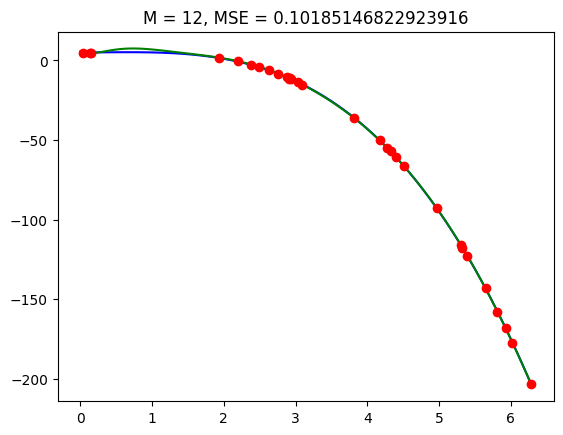

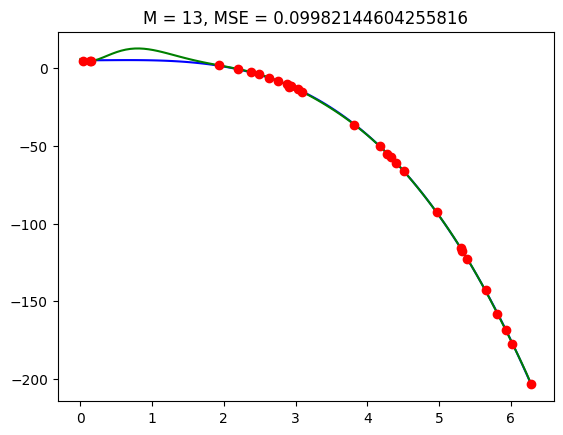

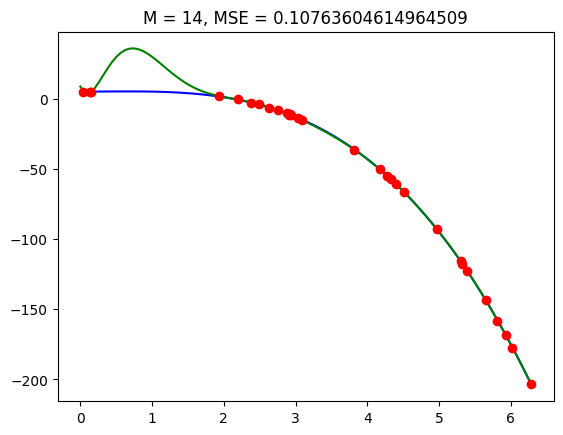

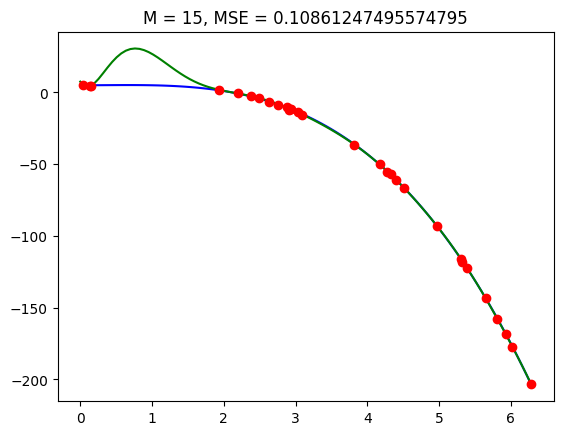

In [24]:
do_all(x, fun1, error_normal)

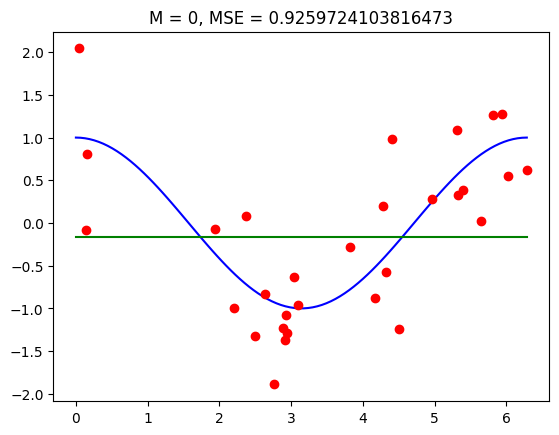

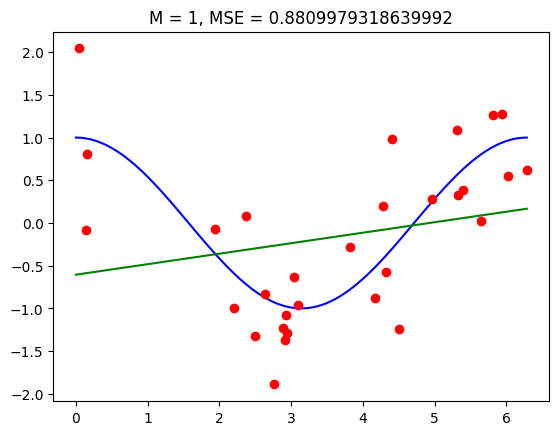

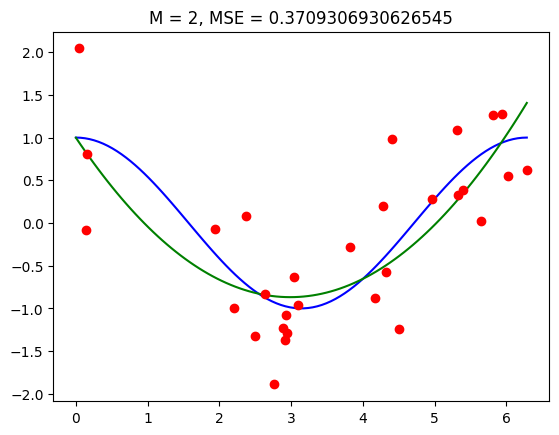

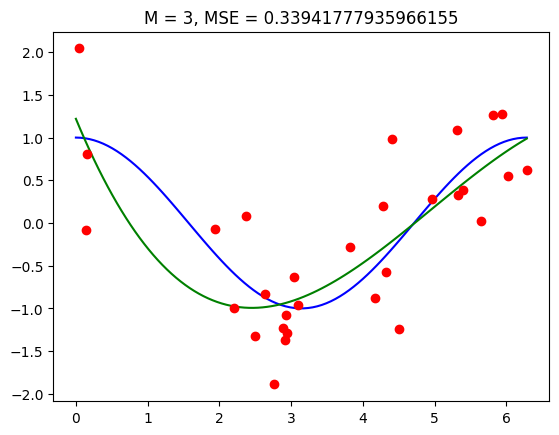

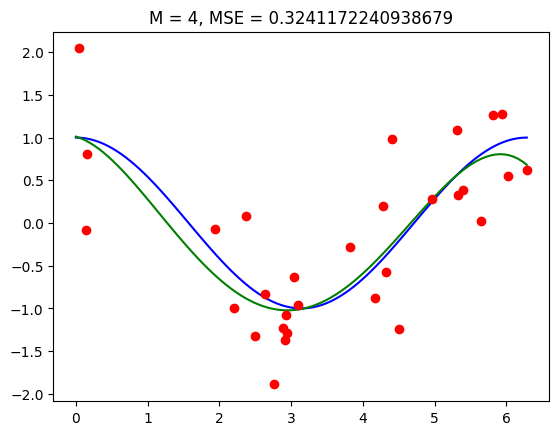

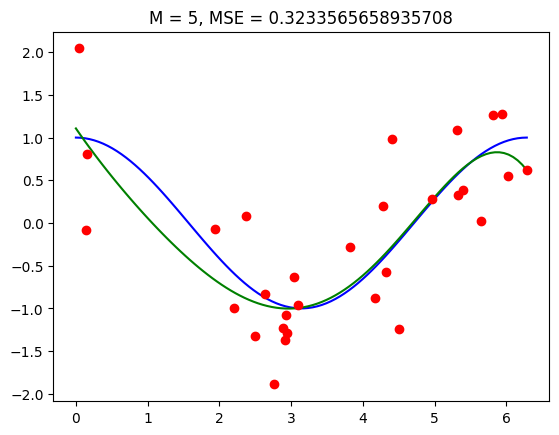

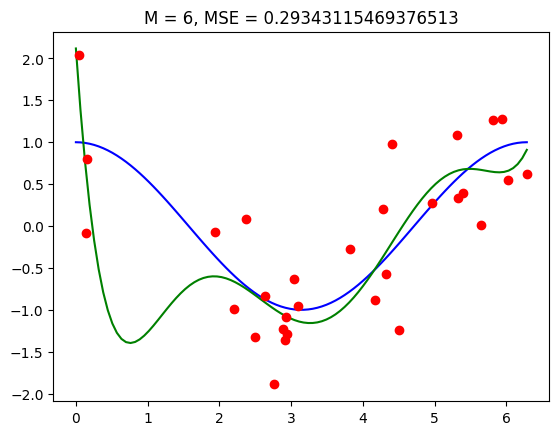

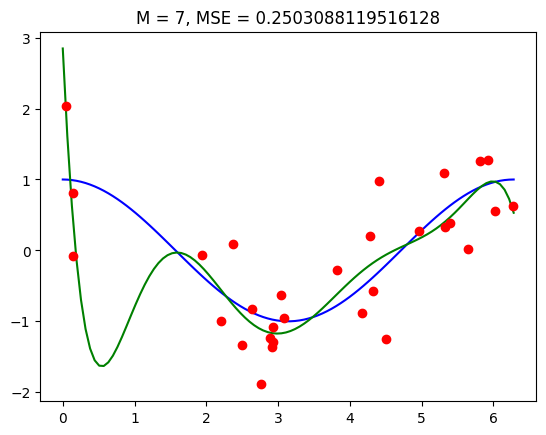

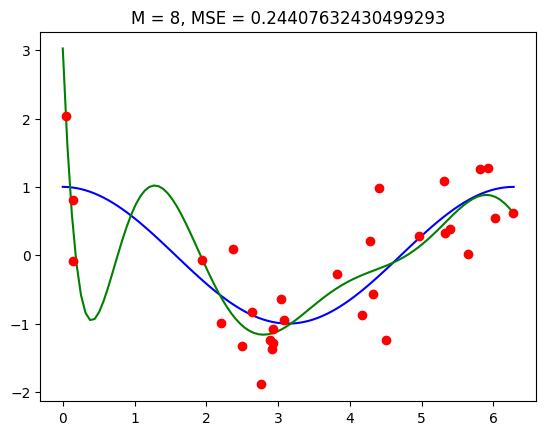

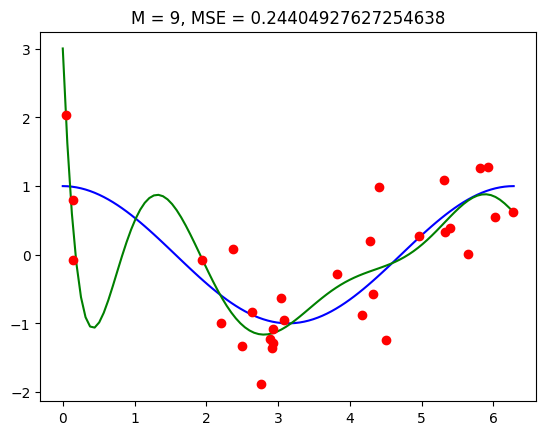

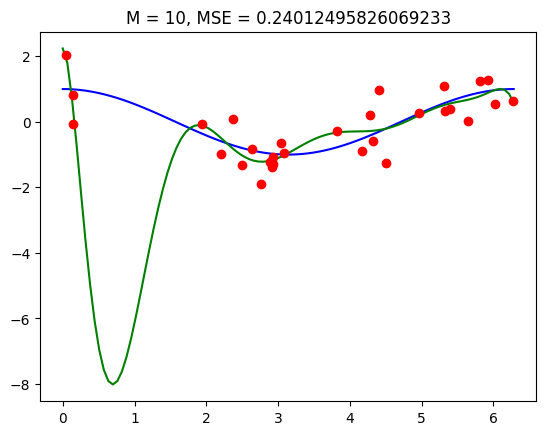

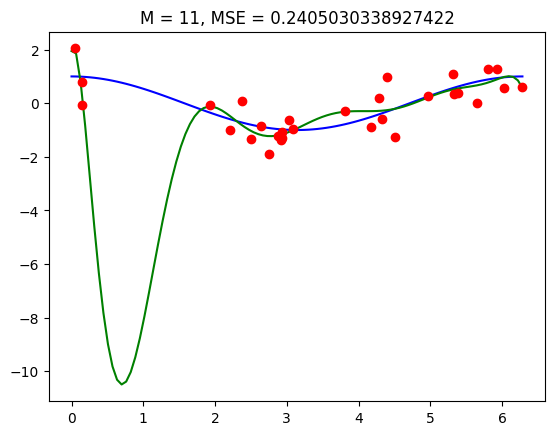

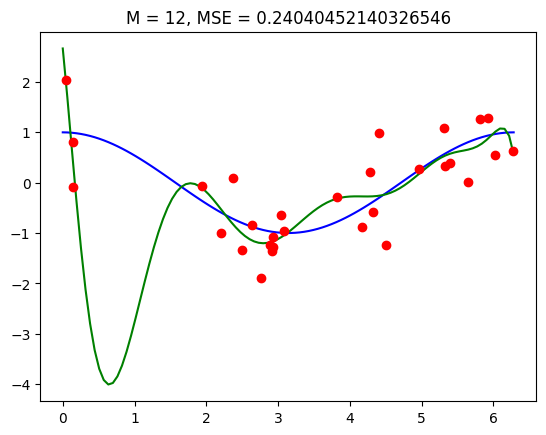

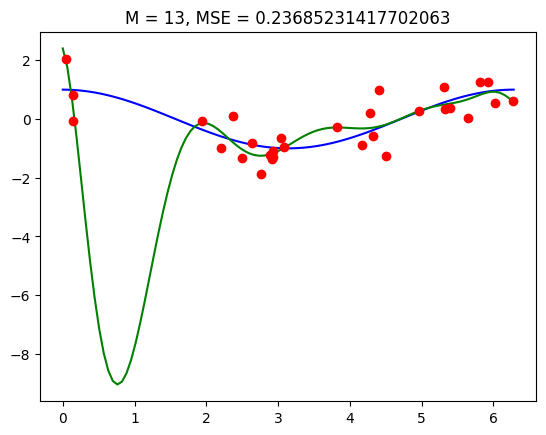

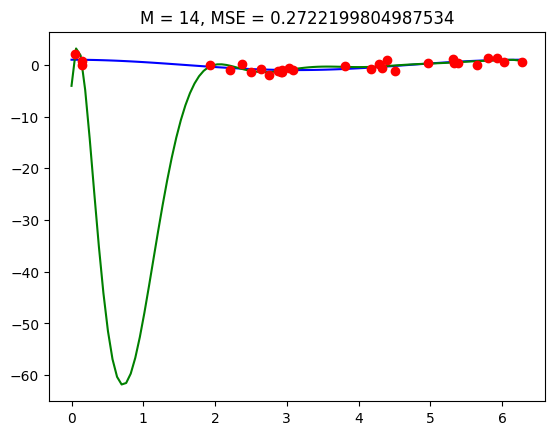

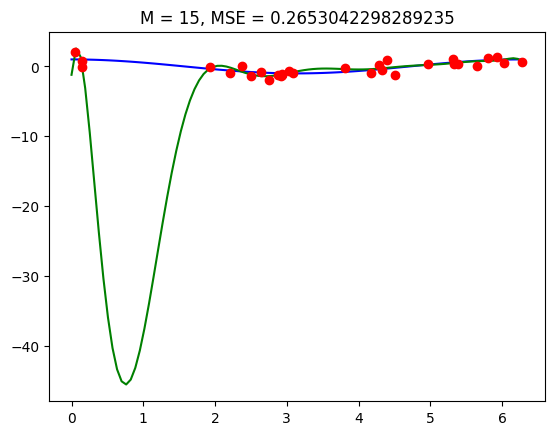

In [25]:
do_all(x, fun2, error_normal)

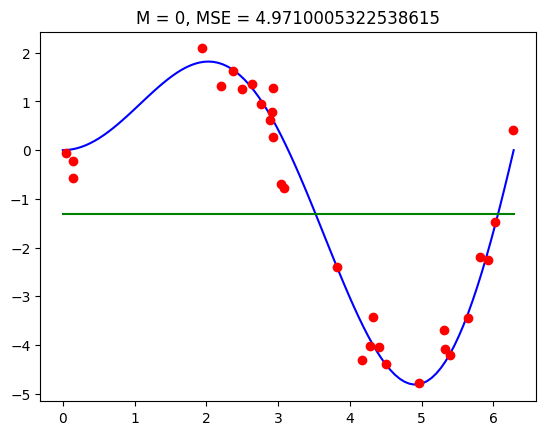

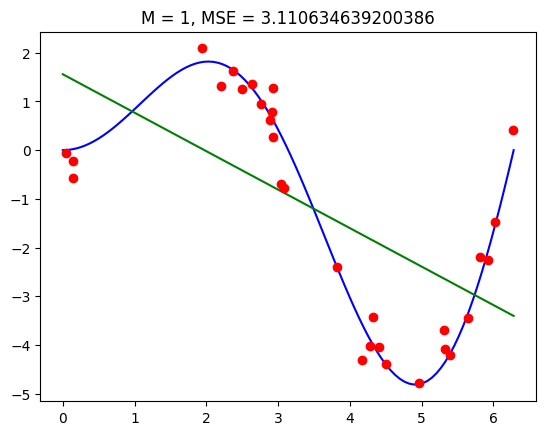

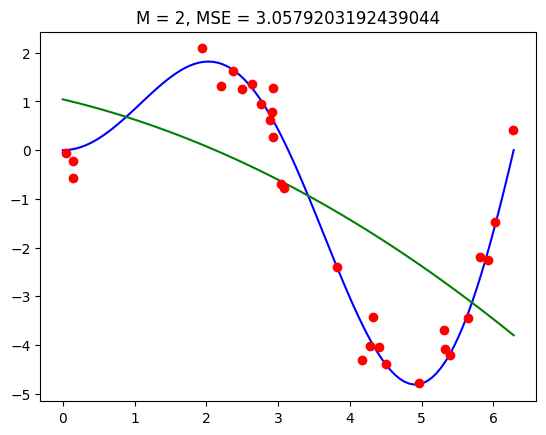

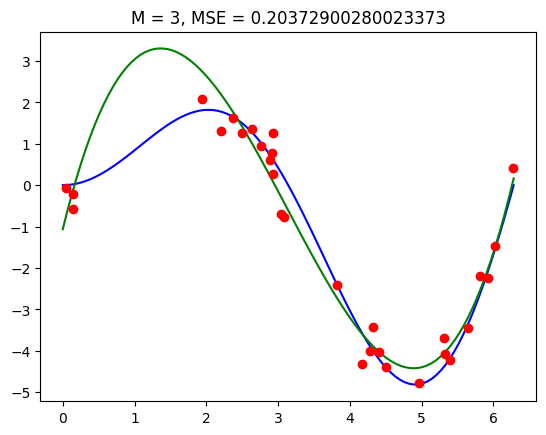

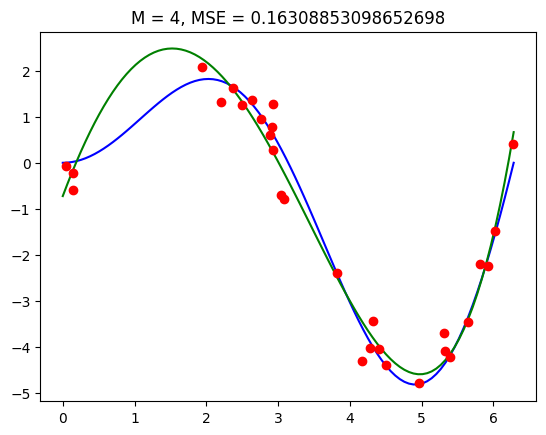

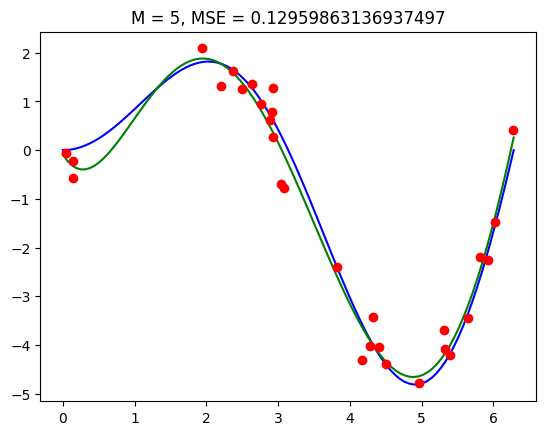

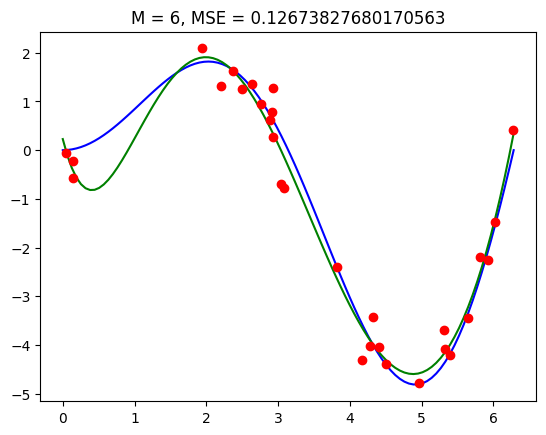

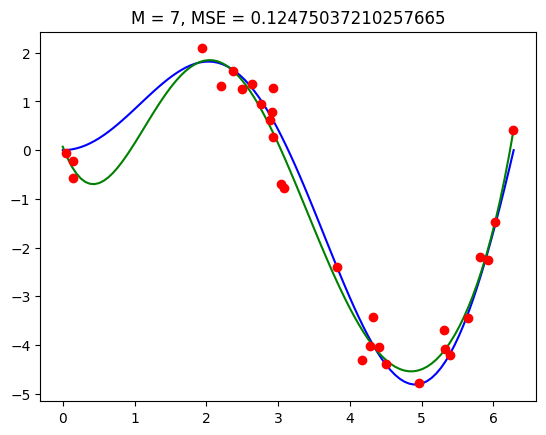

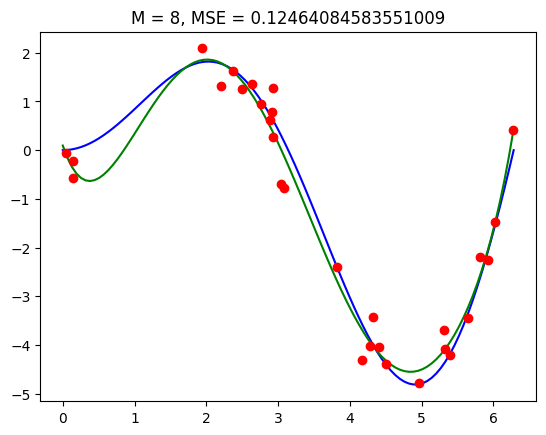

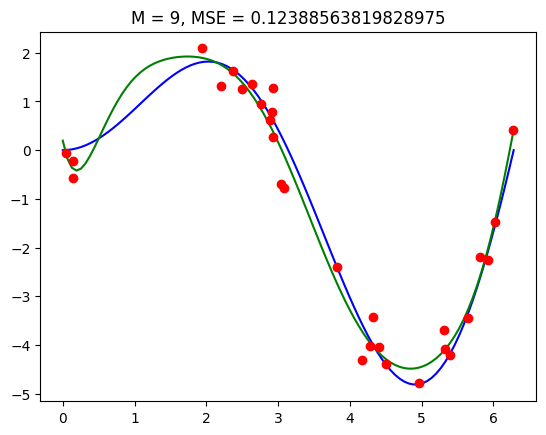

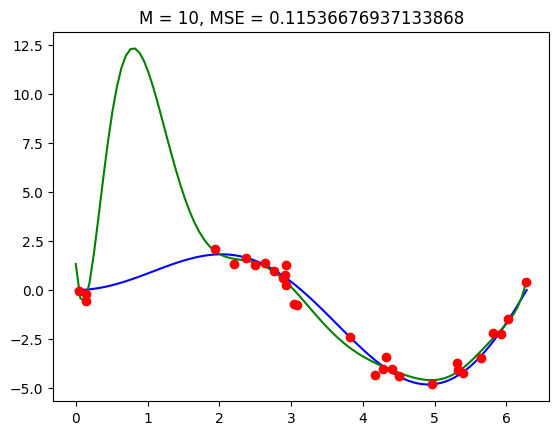

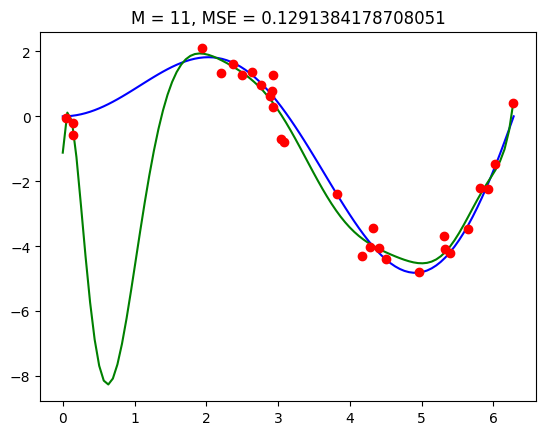

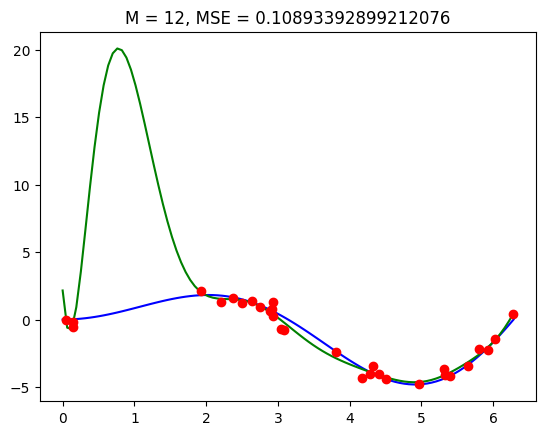

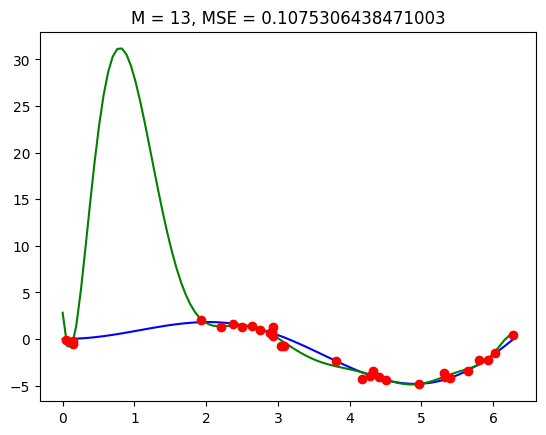

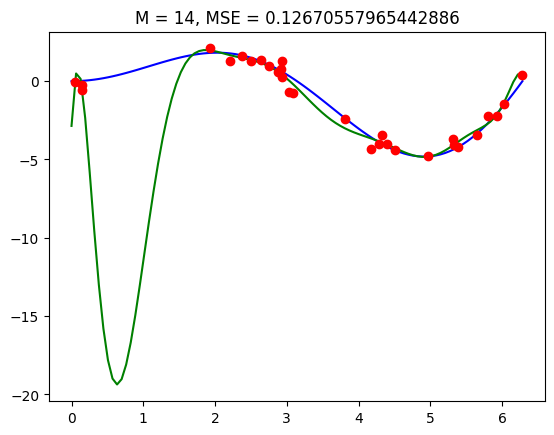

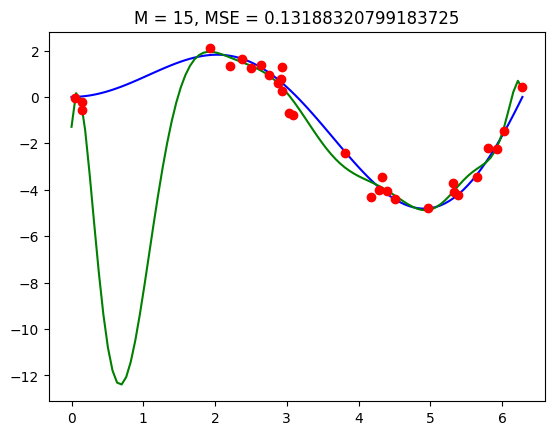

In [26]:
do_all(x, fun3, error_normal)